## HW10: SVD vs. AM

In class, you learned about two ways of solving PCA. Let's compare them. The data you will use is from part (h) of the airbnb homework.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Download 'airbnb_hw4.csv' from Canvas. 'airbnb_hw4.csv' contains the full dataset we will use throughout this assignment (Y_full). Because it is big, we will start by only looking at the first third of the data (Y).

In [3]:
# data
Y_full = pd.read_csv('airbnb_hw4.csv', header=None)
n_full, d = Y_full.shape
Y = Y_full.iloc[0:n_full//3]

Y = Y.to_numpy()
Y_full = Y_full.to_numpy()

#### a) Top-k SVD and residual error.
For the airbnb data and for $k = 1,2,...,10$, compute the top-k SVD
$U_k \Sigma_k V_k^T$
and the residual error
$||Y - U_k \Sigma_k V_k^T||.$

In [4]:
from numpy.linalg import norm
from scipy.linalg import svd

residual_errors = []
for k in range(1, 11):
    U, Sigma, VT = svd(Y, full_matrices=False)
    Uk = U[:, :k]
    Sk = np.diag(Sigma[:k])
    VTk = VT[:k, :]

    Y_approx = Uk @ Sk @ VTk  # Top-k SVD approximation
    residual = norm(Y - Y_approx)  # Residual error
    residual_errors.append(residual)
    print("k =", k)
    print("U =", Uk)
    print("Sigma =", Sk)
    print("VT =", VTk)
    print("Residual Error =", residual)

k = 1
U = [[-0.00049659]
 [-0.01652497]
 [-0.00481081]
 ...
 [-0.01639274]
 [-0.01640954]
 [-0.00049569]]
Sigma = [[69094.09707068]]
VT = [[-7.22077170e-04 -7.22077170e-04 -6.23523160e-04 ...  1.21839398e-05
   4.41303884e-06 -2.19135044e-04]]
Residual Error = 11774.831410138786
k = 2
U = [[-0.00049659 -0.04193492]
 [-0.01652497 -0.04423822]
 [-0.00481081 -0.0891971 ]
 ...
 [-0.01639274 -0.0113248 ]
 [-0.01640954 -0.01663181]
 [-0.00049569 -0.03260267]]
Sigma = [[69094.09707068     0.        ]
 [    0.          9432.21975333]]
VT = [[-7.22077170e-04 -7.22077170e-04 -6.23523160e-04 ...  1.21839398e-05
   4.41303884e-06 -2.19135044e-04]
 [-9.65771965e-03 -9.65771965e-03 -9.48932626e-03 ...  1.36375124e-04
   2.08517853e-05 -2.94825171e-03]]
Residual Error = 7048.395935388465
k = 3
U = [[-0.00049659 -0.04193492 -0.05745645]
 [-0.01652497 -0.04423822 -0.04674086]
 [-0.00481081 -0.0891971  -0.07113584]
 ...
 [-0.01639274 -0.0113248   0.01825093]
 [-0.01640954 -0.01663181  0.00807352]
 [-0.0

#### b) Plot the residual error as a function of $k$.
What do you observe? Would you say the top $k$ SVD is a good approximation?  For what $k$?

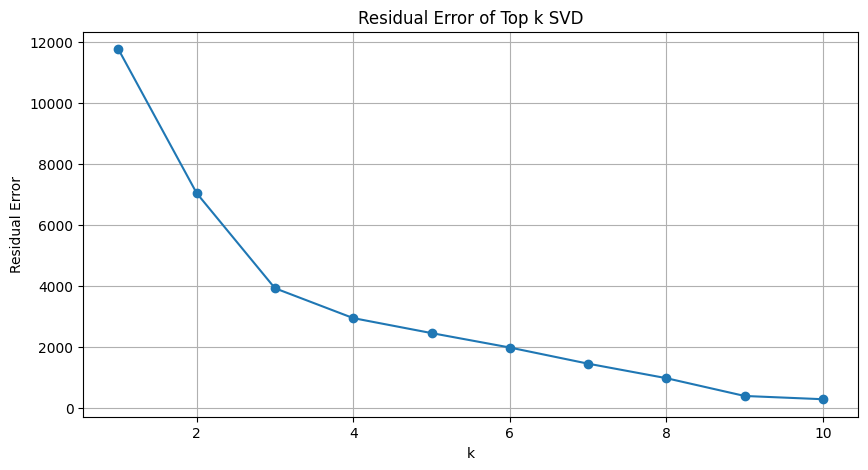

In [ ]:
k_values = list(range(1, 11))
plt.figure(figsize=(10, 5))
plt.plot(k_values, residual_errors, marker='o')
plt.title('Residual Error of Top k SVD')
plt.xlabel('k')
plt.ylabel('Residual Error')
plt.grid(True)
plt.show()

With k increasing, residual error declines, but the decline slows down, suggesting that each additional singular value contributes less to reducing the approximation error.

k=8 may be a good choice, because at this time the residual error seems to flatten slightly, indicating that further increases in k have minimal impact on improving the approximation.

The top-k SVD appears to be a good approximation particularly when k is between 4 and 7, as the most substantial reduction in error occurs in this range. Choosing a k value in this range provides a balance between accuracy (low residual error) and efficiency (not too large k). The exact choice might depend on specific needs regarding computational resources and the acceptable level of approximation error.

#### c) Alternating minimization

Set $k=10$. Generate a random starting matrix $W \in \mathbb{R}^{k \times d}$ with `np.random.randn`. Use least squares to solve
$$ \text{minimize}\quad\|Y - XW\|_F^2 $$
for $X$. Now fix that $X$ and use least squares to solve for $W$. Repeat this 10 times (ie, 10 solves each for $X$ and $W$). (Cache the Gram matrix for each least squares problem for a faster solve!)

In [ ]:
from numpy.linalg import inv

k = 10
n, d = Y.shape
W = np.random.randn(k, d)

def alternating_least_squares(Y, W, k, iterations=10):
    X = np.random.randn(n, k)
    for _ in range(iterations):
        Gram_X = X.T @ X
        W = inv(Gram_X) @ X.T @ Y
        Gram_W = W @ W.T
        if np.linalg.det(Gram_W) != 0:
          X = Y @ W.T @ np.linalg.inv(Gram_W)
        else:
          X = Y @ W.T @ np.linalg.pinv(Gram_W)

    return X, W
X_final, W_final = alternating_least_squares(Y, W, k)

print("Final W matrix:")
print(W_final)

Final W matrix:
[[-5.30436102e-01 -5.30436102e-01  2.46282958e-02 ... -7.28393906e-04
  -2.68293638e-04  1.21062676e-02]
 [ 3.60057023e-01  3.60057023e-01 -7.16495563e-02 ...  1.84039066e-03
   7.43632900e-04 -3.17188255e-02]
 [-6.51282170e-01 -6.51282170e-01 -5.37139201e-02 ...  1.08491904e-03
   2.18819587e-04 -2.48235201e-02]
 ...
 [-1.44893961e+00 -1.44893961e+00 -5.21045598e-02 ...  8.80479331e-04
   1.43998536e-04 -2.09094566e-02]
 [-6.79446930e-01 -6.79446930e-01  2.94650202e-02 ... -1.44386212e-03
  -8.85966914e-04  1.72248629e-02]
 [-6.98973186e-01 -6.98973186e-01 -2.62607936e-02 ...  5.80068913e-04
   1.84635438e-04 -1.28083811e-02]]


#### d) Plot the residual error $|| Y - XW ||$ as a function of iteration.

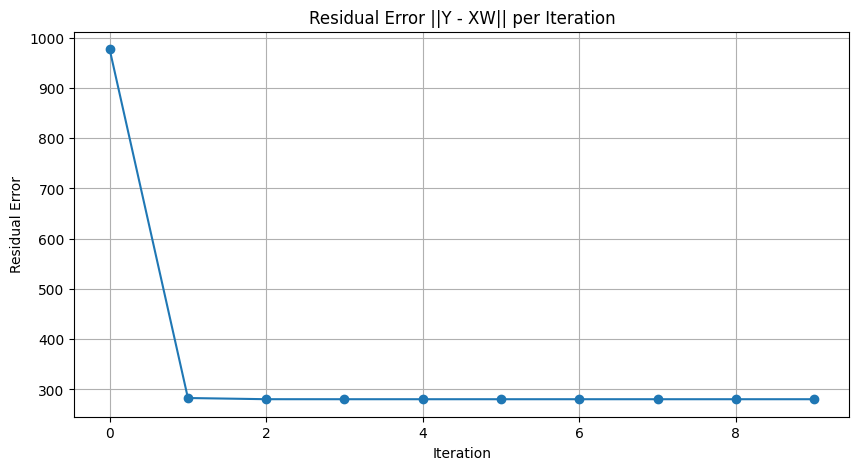

In [ ]:
k = 10
n, d = Y.shape
W = np.random.randn(k, d)

def alternating_least_squares(Y, W, k, iterations=10):
    X = np.random.randn(n, k)
    residual_errors = []

    for _ in range(iterations):
        Gram_X = X.T @ X
        W = inv(Gram_X) @ X.T @ Y
        Gram_W = W @ W.T
        X = Y @ W.T @ inv(Gram_W)
        residual = norm(Y - X @ W, 'fro')
        residual_errors.append(residual)

    return residual_errors

residual_errors = alternating_least_squares(Y, W, k)

# Plot the residual errors
plt.figure(figsize=(10, 5))
plt.plot(residual_errors, marker='o')
plt.title('Residual Error ||Y - XW|| per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Residual Error')
plt.grid(True)
plt.show()

#### e) How do the two methods compare?

In particular, compare the residual error when $k=10$.

Generally, top-k SVD will have a lower or equal residual error compared to AM when both are tasked with finding a rank-k approximation. For example, when k = 10, the residual error of top-k SVD is a little bit smaller than that of ALS. This is due to the optimality properties of SVD in terms of minimizing the Frobenius norm. AM might not converge to the global minimum and is sensitive to the initial values of X and W.
However, SVD is computationally intensive, especially for large matrices. AM can be more efficient in cases where the data is sparse or when only a few iterations are run, as it doesn't require computation of the entire eigenspace.



#### f) PCA on the full dataset (approximately)

Ideally, we would like to apply PCA to the full dataset, but even the small subset takes a while.

In the AM method, $W$ has as many columns as $Y$, while $X$ has as many rows as $Y$. The full dataset has more rows, so we could fix the same $W$ we derived for the small dataset, and use this to find $X_\text{full}$ for the full dataset by solving
$$\text{minimize}  \|Y_\text{full} - X_\text{full} W\|_F^2 $$
with variable $X$.
That is, we fix $W$ and take one more step of AM (using $Y_\text{full}$) to compute $X_{full}$.

How does the new average residual error per row compare to the previous average residual error per row?

In [ ]:
n_full, d_full = Y_full.shape
Gram_W = W @ W.T
inv_Gram_W = inv(Gram_W) if np.linalg.det(Gram_W) != 0 else np.linalg.pinv(Gram_W)
X_full = Y_full @ W.T @ inv_Gram_W

residual_error_full = norm(Y_full - X_full @ W, 'fro')
average_residual_error_per_row = residual_error_full / n_full
print("Average Residual Error per Row (Full Dataset):", average_residual_error_per_row)

Average Residual Error per Row (Full Dataset): 643.043692451767


The new average residual error is larger than the previous one. It may indicate that W matrix, while suitable for the smaller subset, does not capture all the variances effectively for the full dataset, possibly due to overfitting to the smaller subset or because the full dataset contains additional variations not captured in the smaller subset.